# TP 7 - Remuestreo

Desarrollar un aplicativo que implemente las siguientes funciones:

• Downsampling X2 (mostrando la imagen resultado al doble de tamaño para
comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.

• Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el
efecto) utilizando kernel constante, bilineal, y bicúbico.

• Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering
aleatorio, y difusión del error por scan-line.
    
    
    

In [1]:
%reset
%matplotlib inline

# Importamos numpy (libreria de calculo) y le asignamos el nombre "np"
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc


import time

import sys, os
sys.path.insert(0, 'Libreria')

import espacios_color as espc
import suma_y_resta as syr
import OpsHistLum as ophl
import superFT as sft
import conv_2D as C2D
import morfologia as morfi
import resampleo as RSMP



Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Cargo Imagen

In [2]:
TEST_FOLDER = './Imagenes'
OUT_FOLDER = './Salidas'

# Cargo
TEST_IMAGE = 'Margaret.jpg'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_gray = espc.rgb2gray(imag_ini)

/home/rodriguezcolmeiro/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys


# Downsample

In [3]:
imag_out_cte = RSMP.downsamplear(imag_gray, 2, modo='constante')
imag_out_lin = RSMP.downsamplear(imag_gray, 2, modo='bilineal')
imag_out_cub = RSMP.downsamplear(imag_gray, 2, modo='bicubico')
print('Tamaño original: %d,%d'%imag_gray.shape)
print('Tamaño final:\t %d,%d'%imag_out_cte.shape)

Tamaño original: 1200,944
Tamaño final:	 600,472


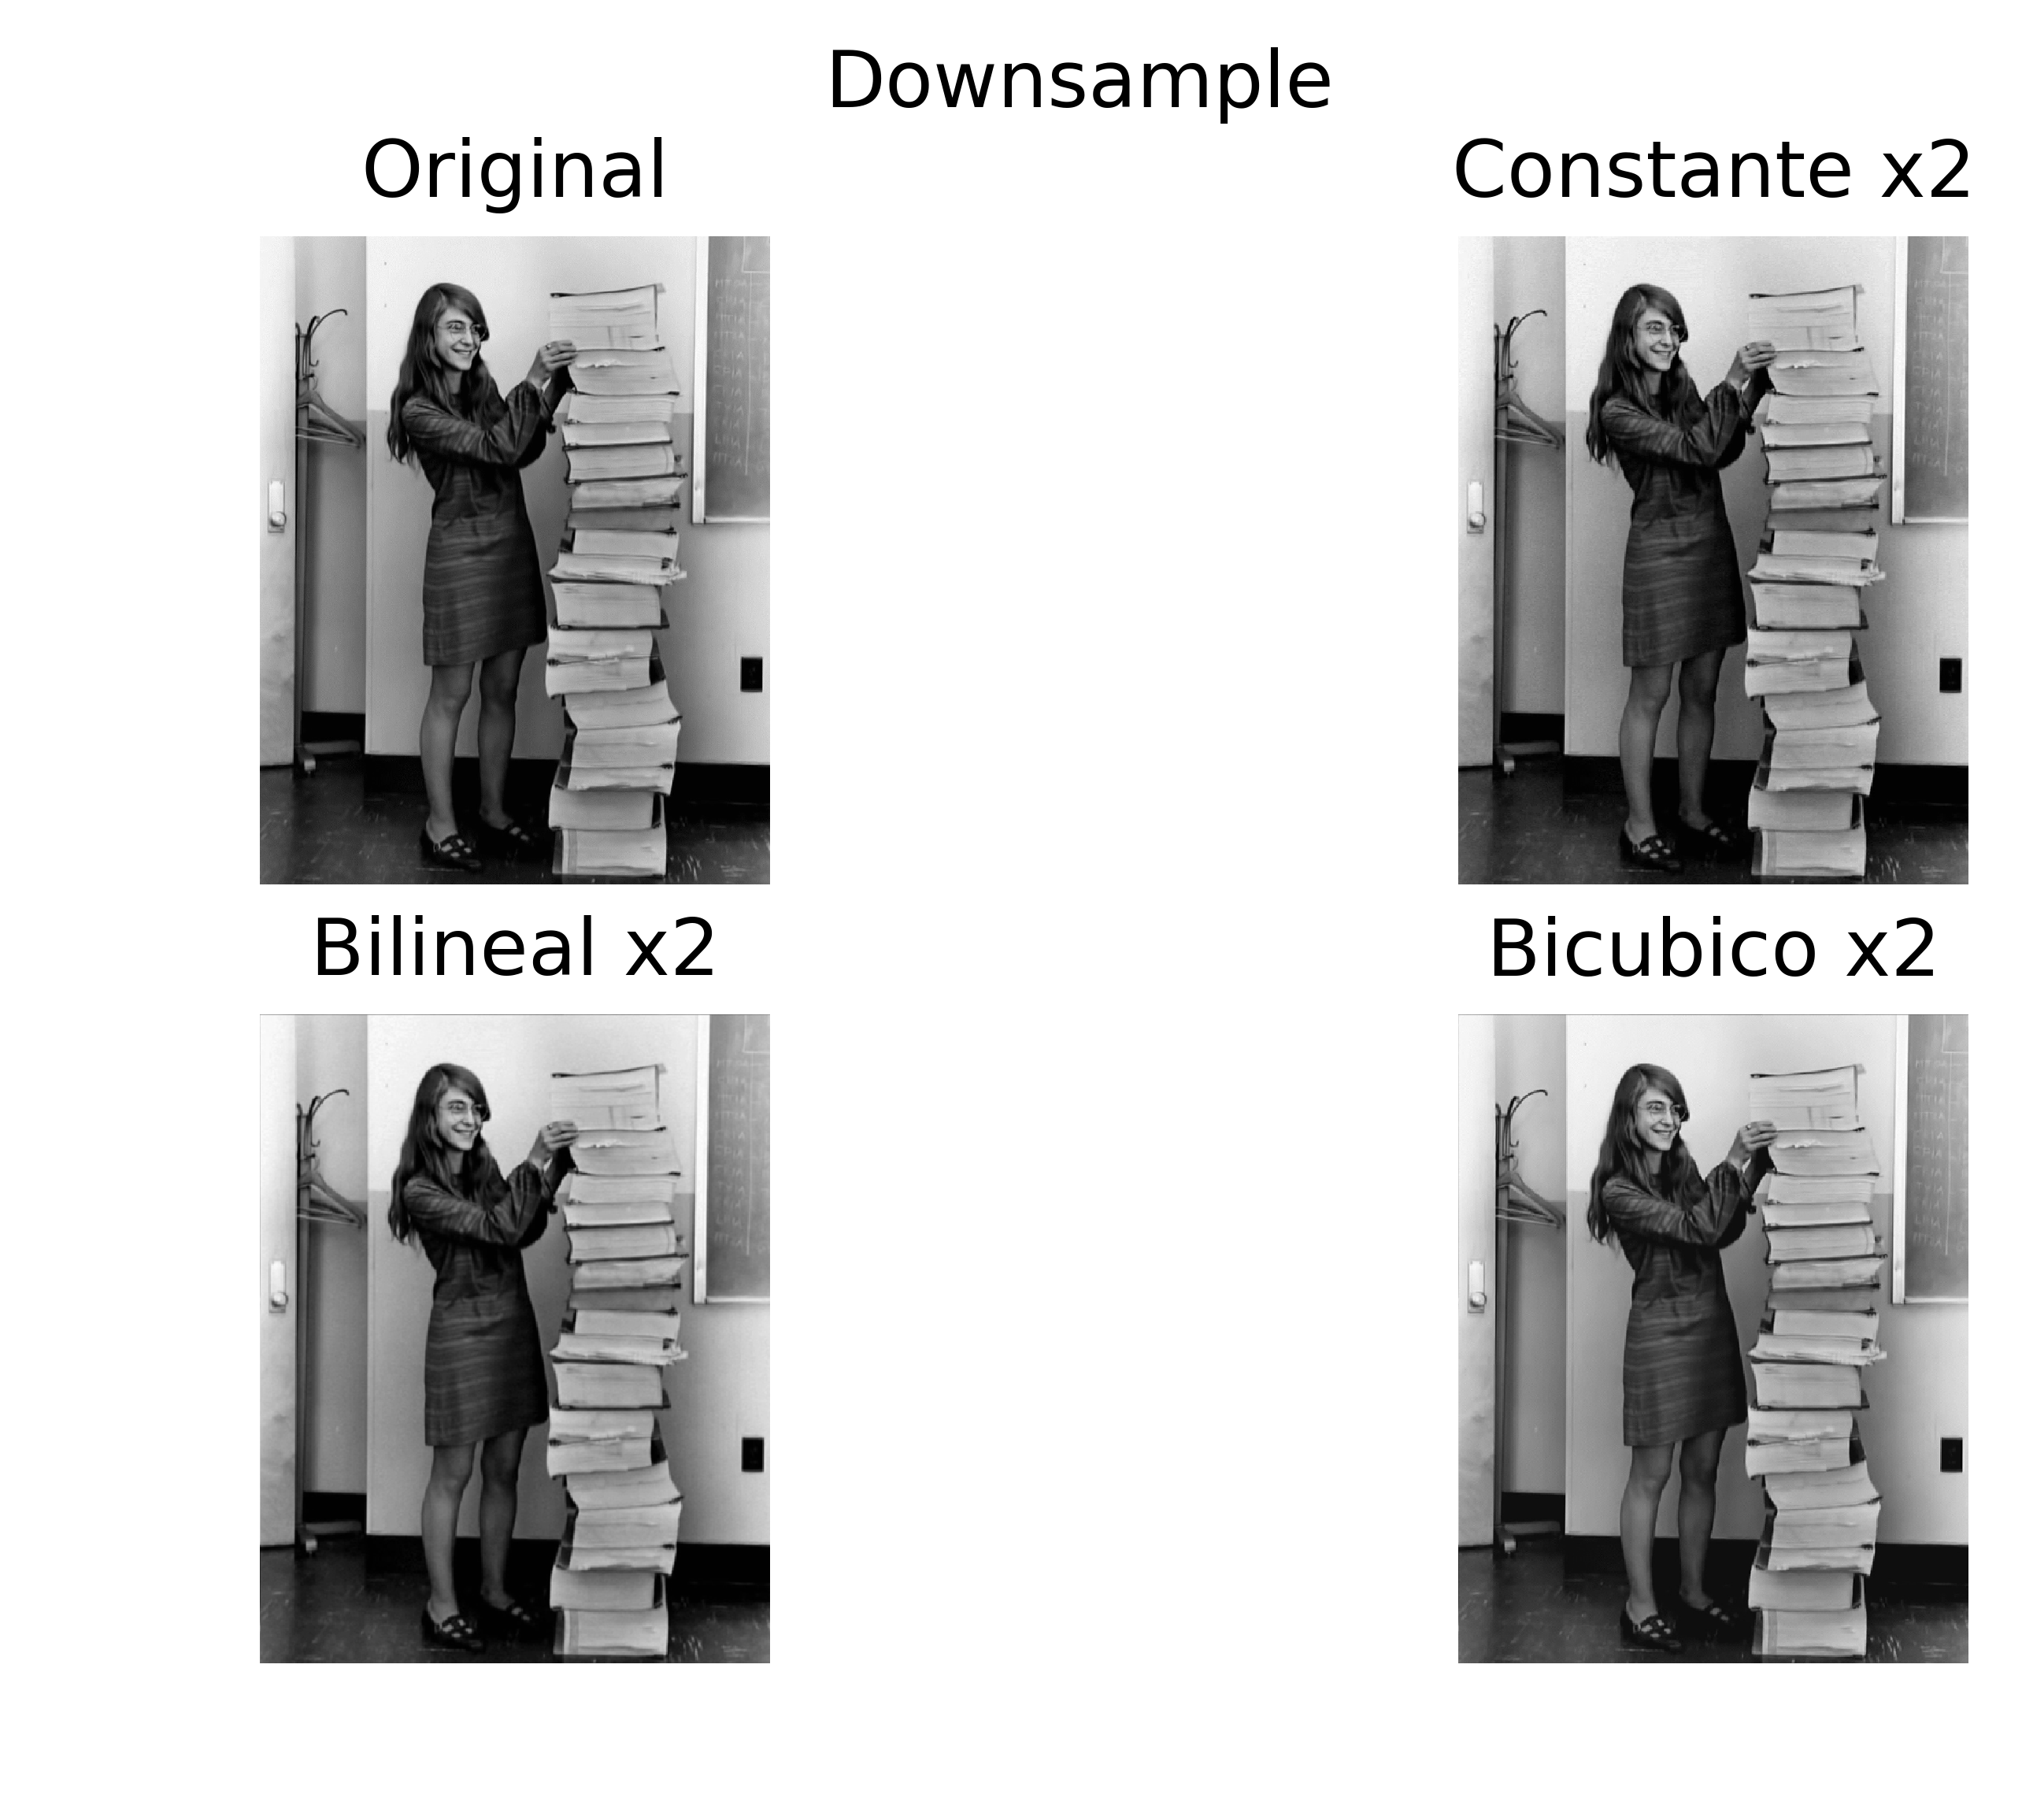

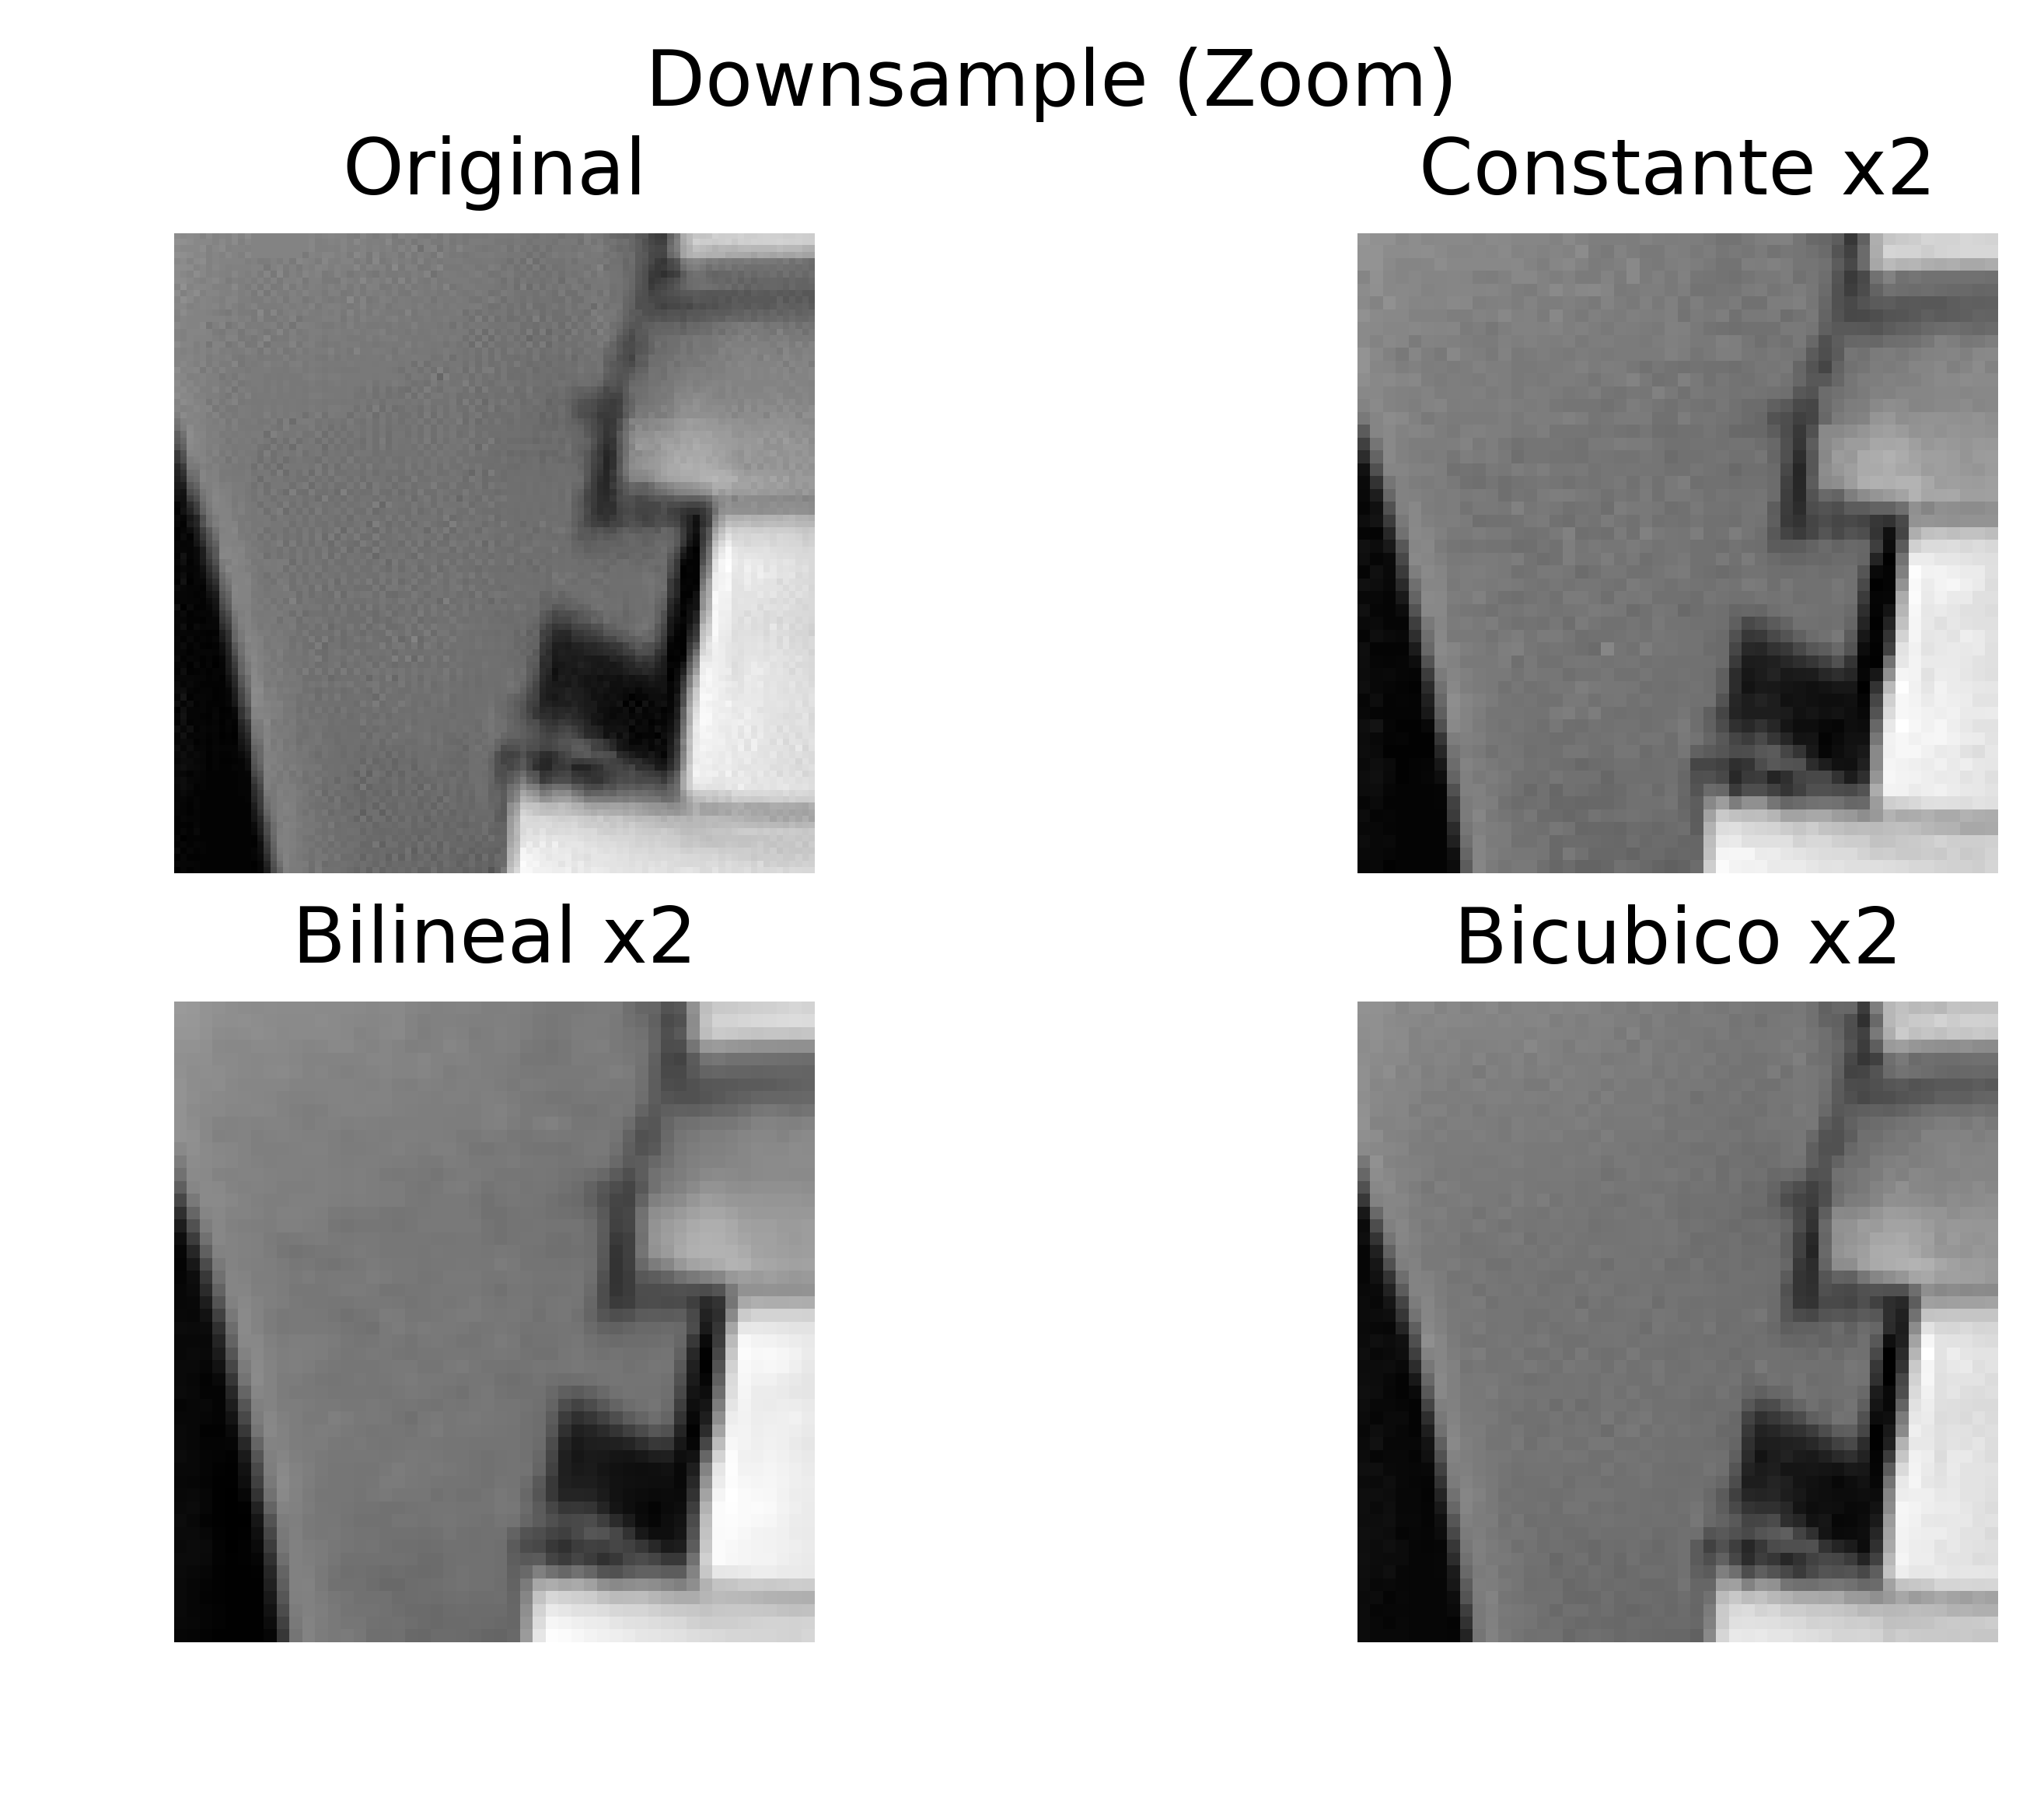

In [4]:
fig = plt.figure(dpi = 600)
fig.suptitle('Downsample')
ax = plt.subplot(2,2,1)
ax.imshow(imag_gray, cmap='gray')
plt.title('Original')
plt.axis('off')
ax = plt.subplot(2,2,2)
ax.imshow(imag_out_cte, cmap='gray')
plt.title('Constante x2')
plt.axis('off')
ax = plt.subplot(2,2,3)
ax.imshow(imag_out_lin, cmap='gray')
plt.title('Bilineal x2')
plt.axis('off')
ax = plt.subplot(2,2,4)
ax.imshow(imag_out_cub, cmap='gray')
plt.title('Bicubico x2')
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP7_Downsample.png')
plt.savefig(nom_arch)

plt.show()



fig = plt.figure(dpi = 600)
fig.suptitle('Downsample (Zoom)')
ax = plt.subplot(2,2,1)
ax.imshow(imag_gray[500:600,500:600], cmap='gray')
plt.title('Original')
plt.axis('off')
ax = plt.subplot(2,2,2)
ax.imshow(imag_out_cte[250:300,250:300], cmap='gray')
plt.title('Constante x2')
plt.axis('off')
ax = plt.subplot(2,2,3)
ax.imshow(imag_out_lin[250:300,250:300], cmap='gray')
plt.title('Bilineal x2')
plt.axis('off')
ax = plt.subplot(2,2,4)
ax.imshow(imag_out_cub[250:300,250:300], cmap='gray')
plt.title('Bicubico x2')
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP7_Downsample_zoom.png')
plt.savefig(nom_arch)


plt.show()

# Upsample

In [5]:
imag_out_cte = RSMP.upsamplear(imag_gray, 2, modo='constante')
imag_out_lin = RSMP.upsamplear(imag_gray, 2, modo='bilineal')
imag_out_cub = RSMP.upsamplear(imag_gray, 2, modo='bicubico')
print('Tamaño original: %d,%d'%imag_gray.shape)
print('Tamaño final:\t %d,%d'%imag_out_cte.shape)

Tamaño original: 1200,944
Tamaño final:	 2400,1888


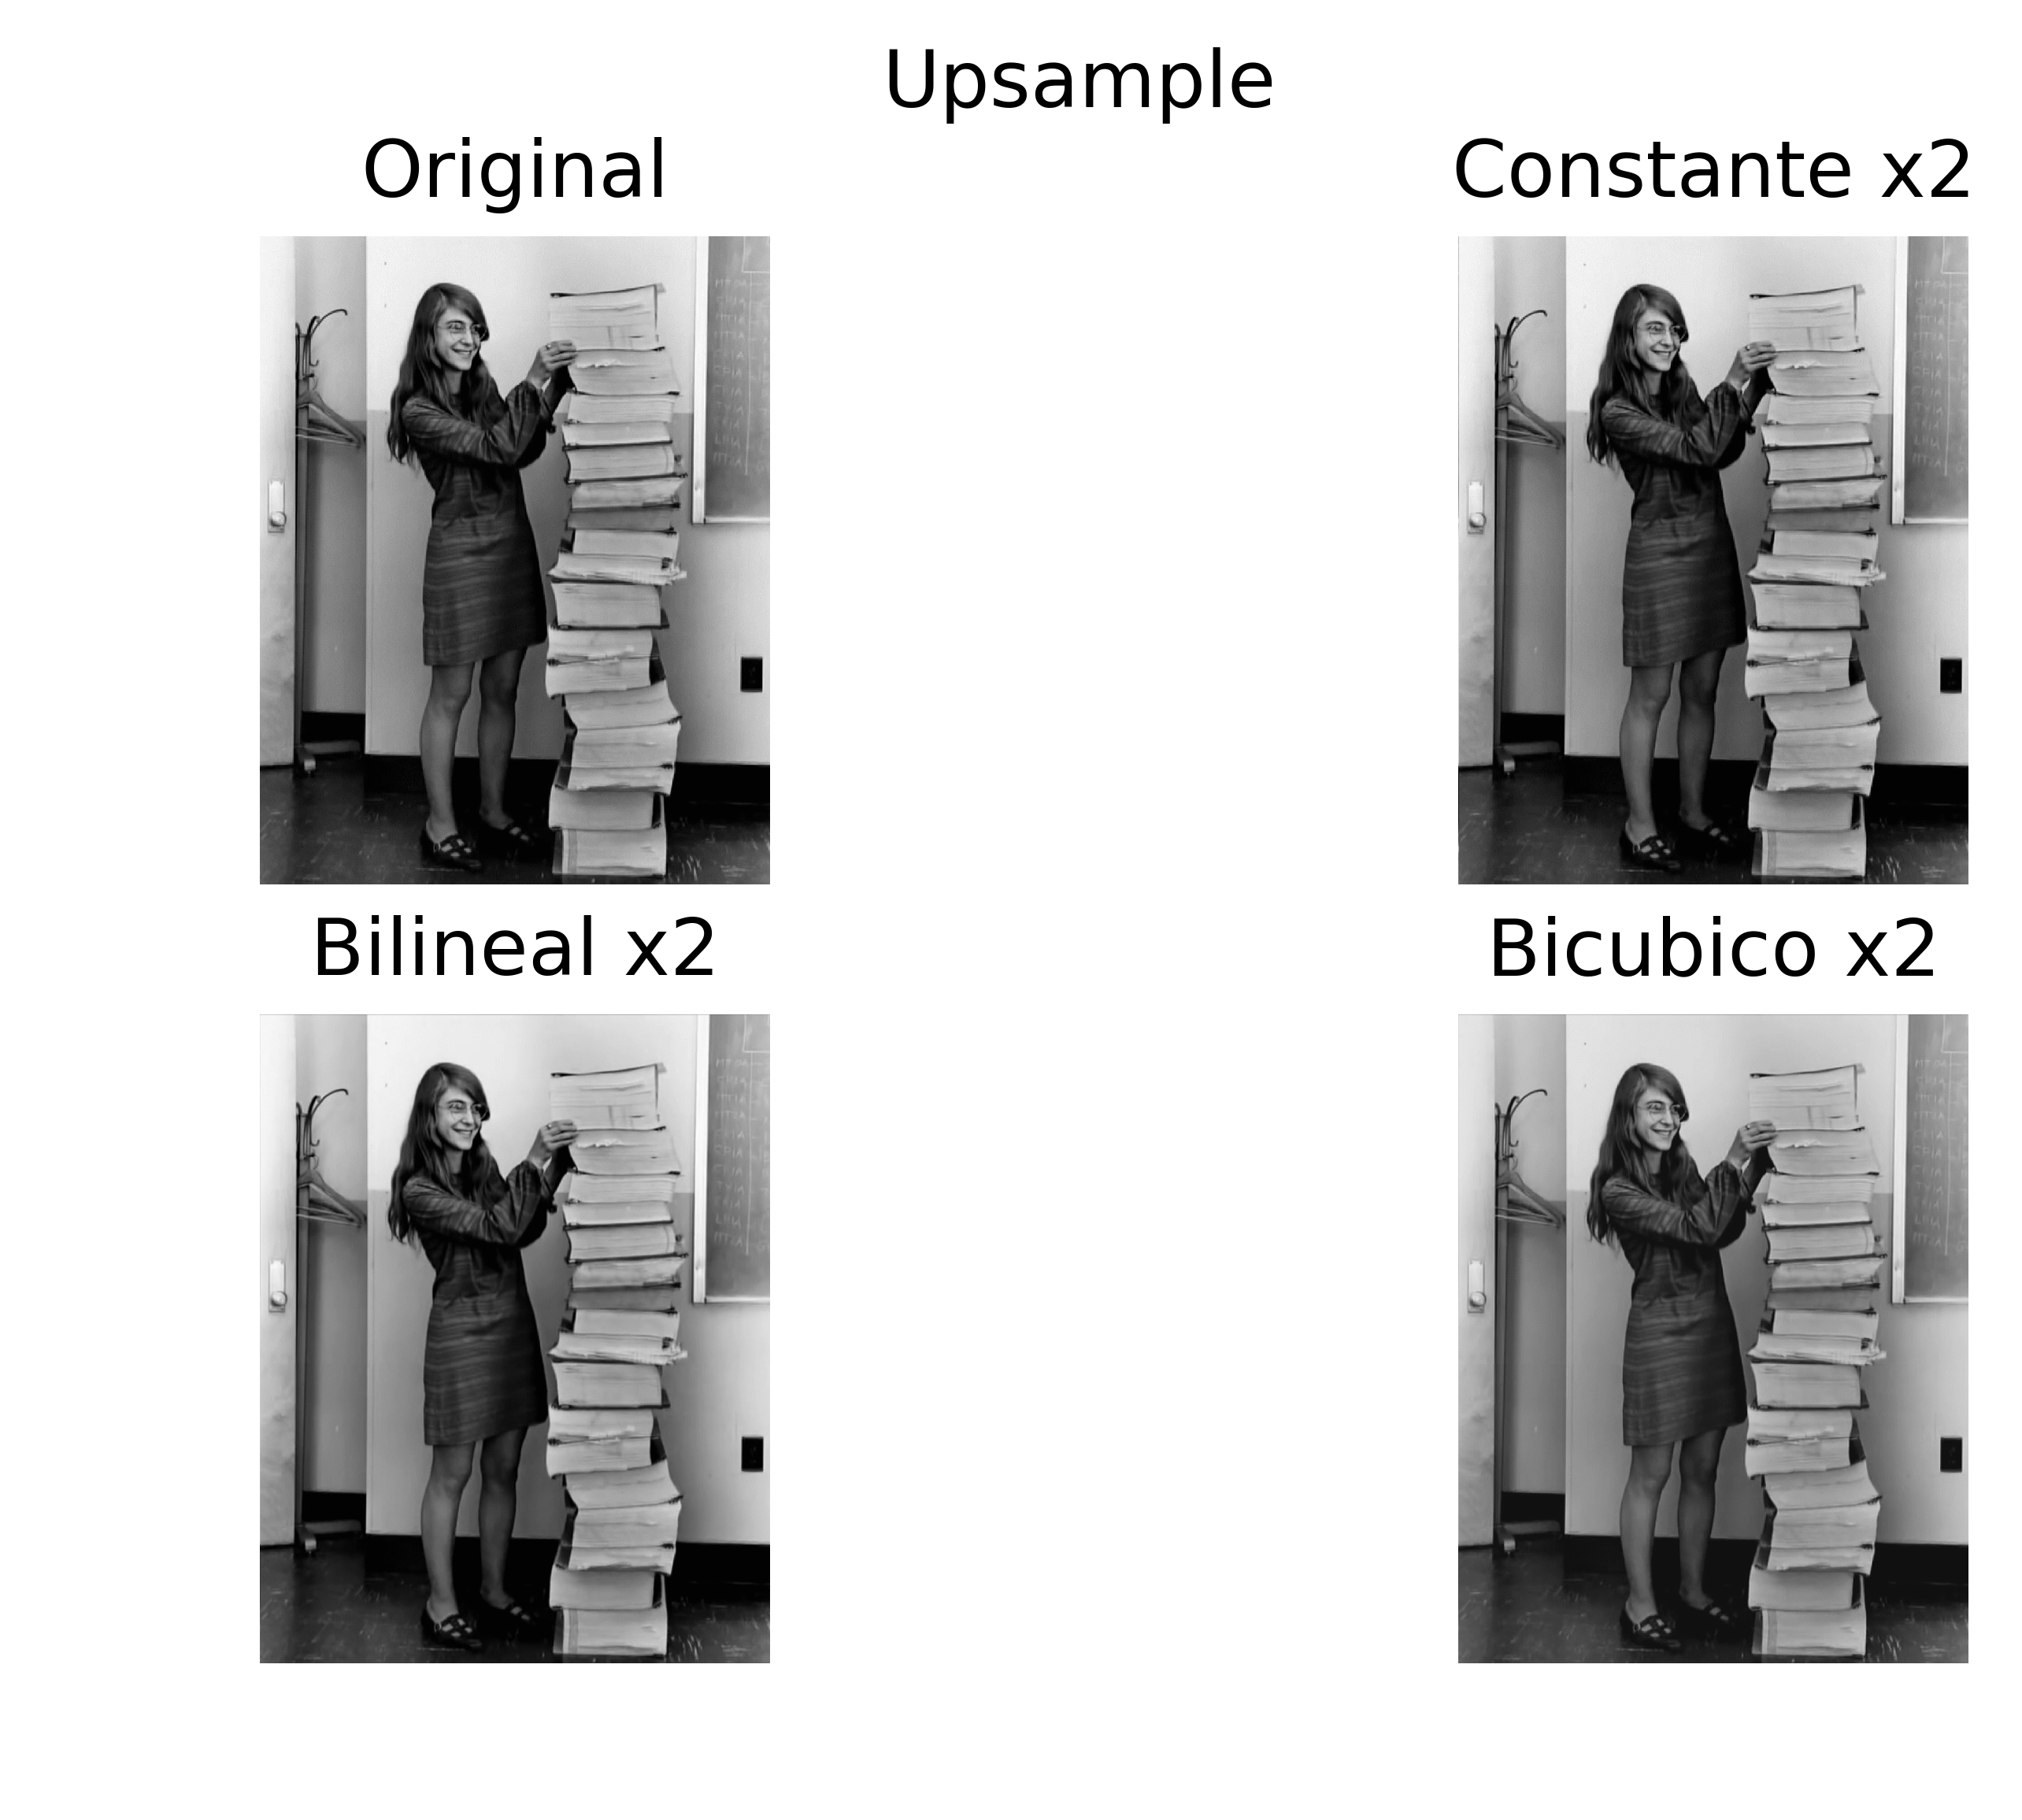

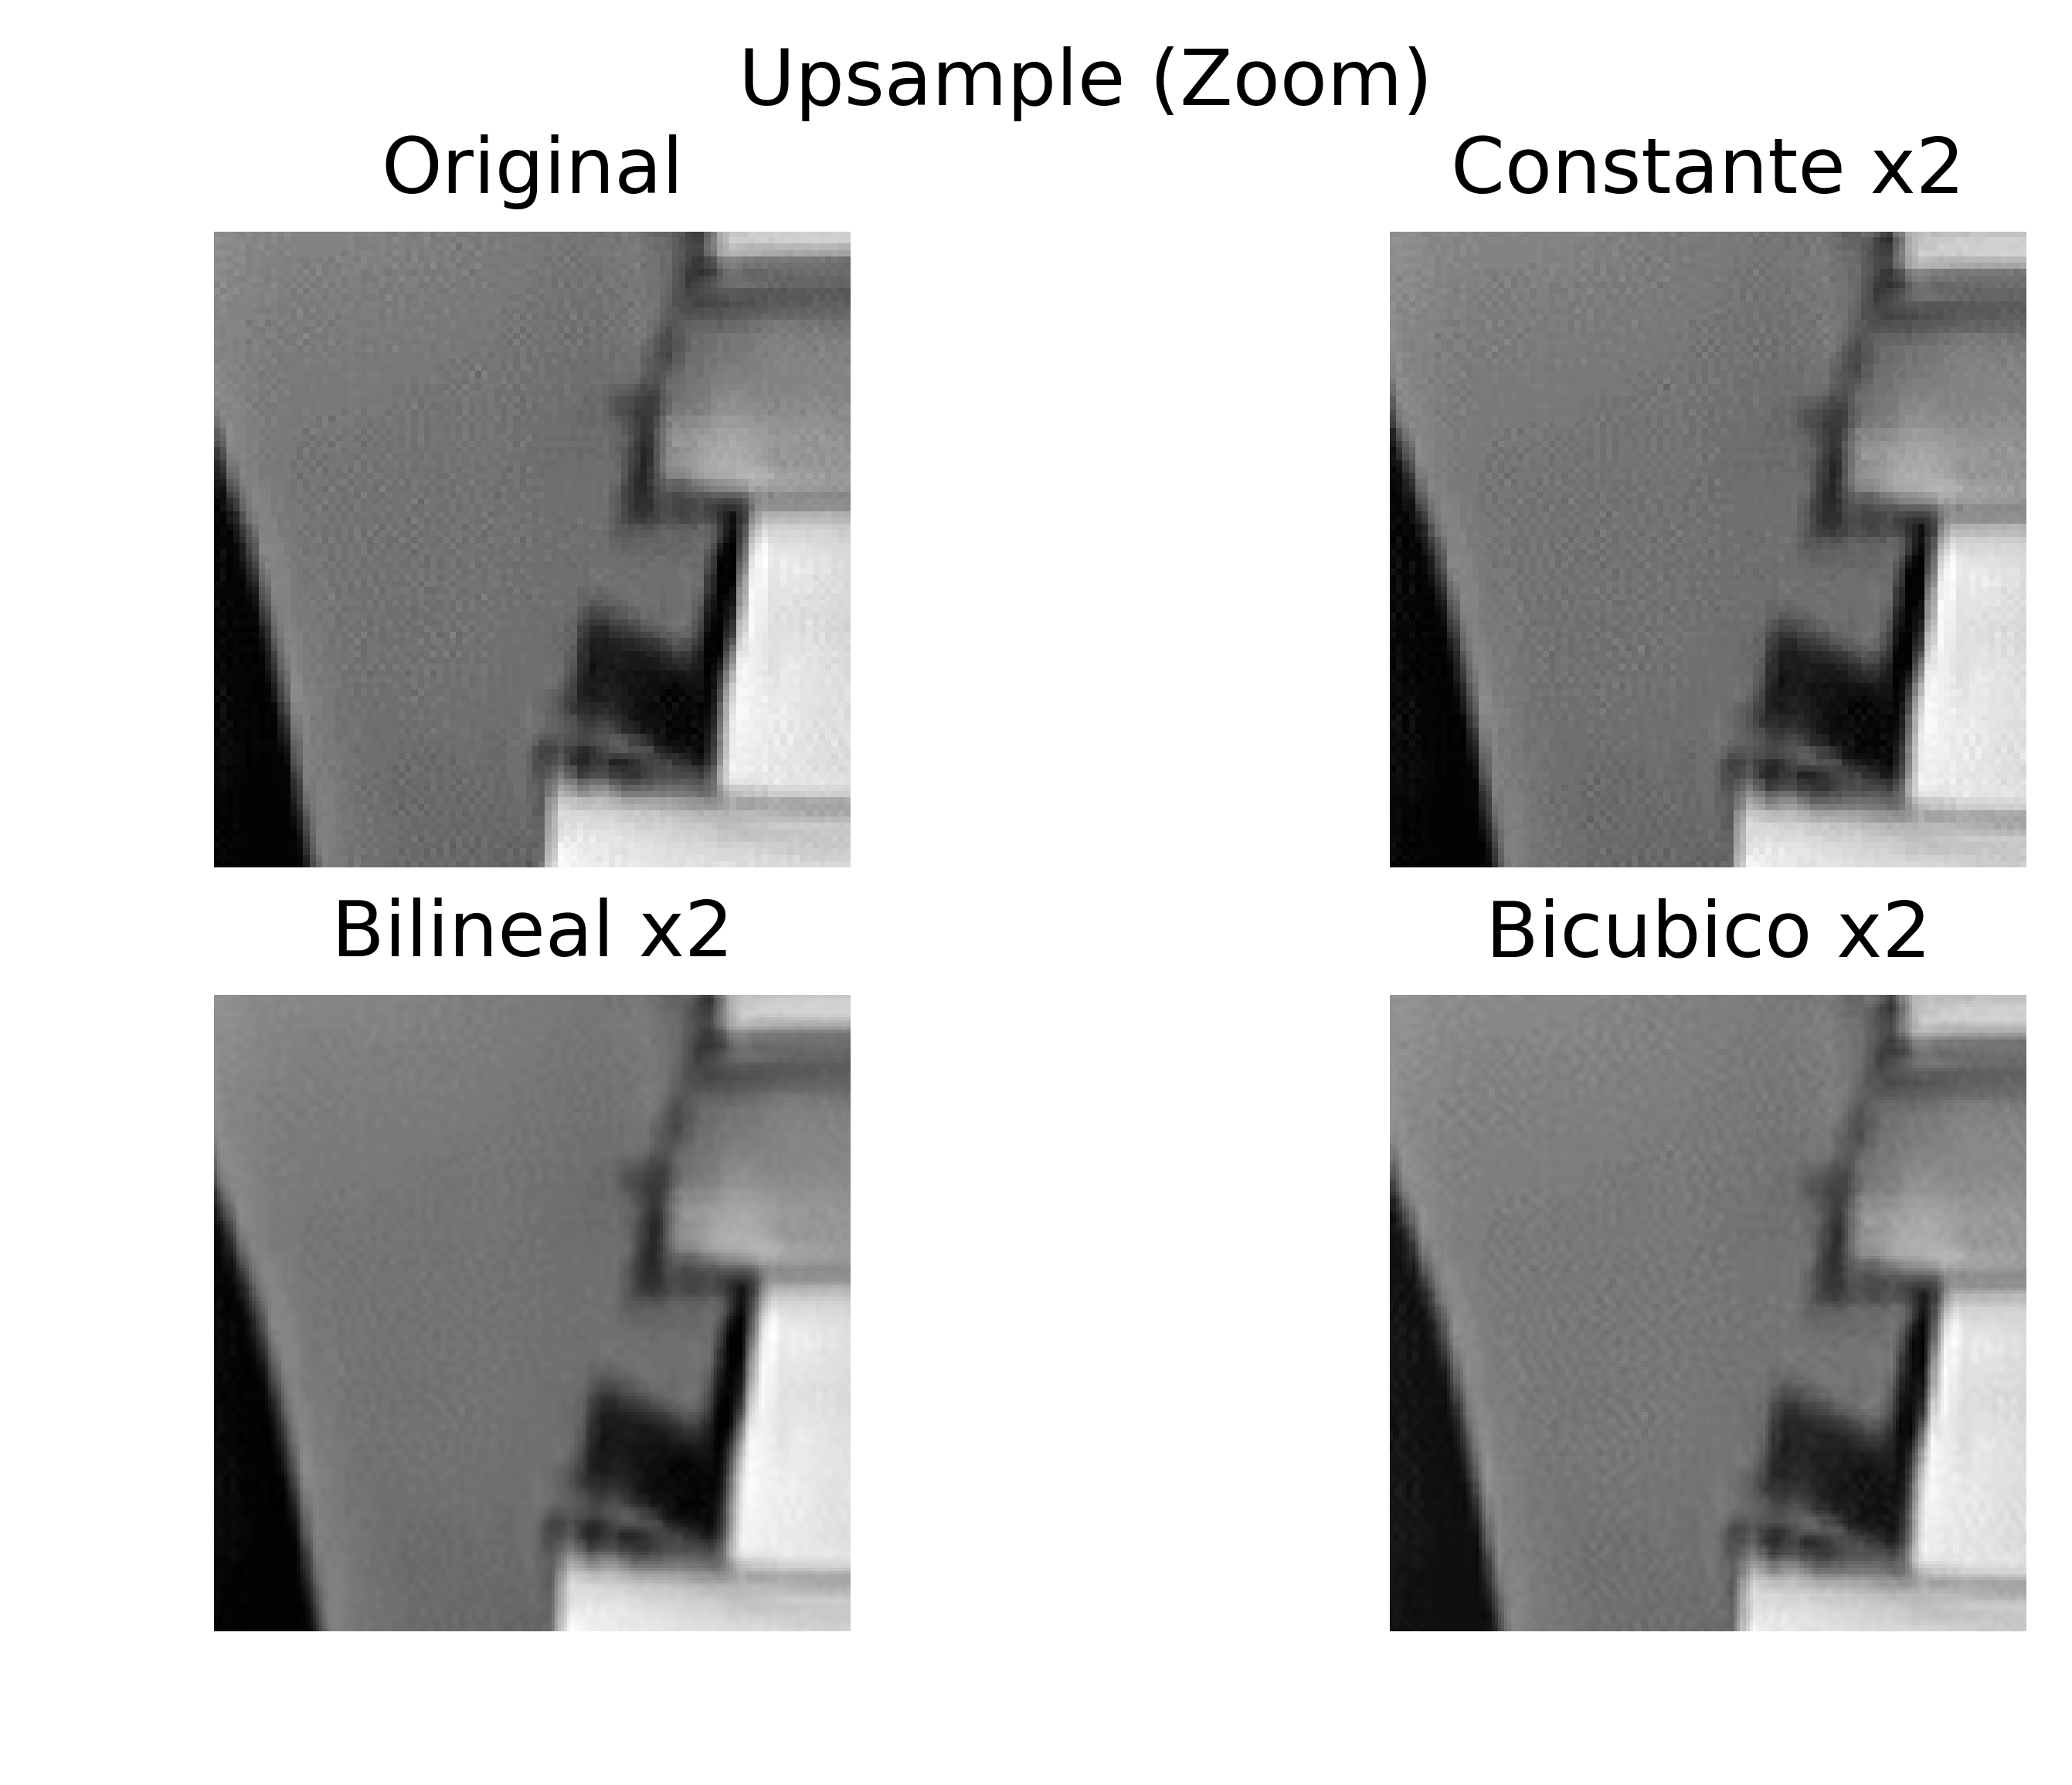

In [6]:
fig = plt.figure(dpi = 600)
fig.suptitle('Upsample')
ax = plt.subplot(2,2,1)
ax.imshow(imag_gray, cmap='gray')
plt.title('Original')
plt.axis('off')
ax = plt.subplot(2,2,2)
ax.imshow(imag_out_cte, cmap='gray')
plt.title('Constante x2')
plt.axis('off')
ax = plt.subplot(2,2,3)
ax.imshow(imag_out_lin, cmap='gray')
plt.title('Bilineal x2')
plt.axis('off')
ax = plt.subplot(2,2,4)
ax.imshow(imag_out_cub, cmap='gray')
plt.title('Bicubico x2')
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP7_Upsample.png')
plt.savefig(nom_arch)


plt.show()



fig = plt.figure(dpi = 600)
fig.suptitle('Upsample (Zoom)')
ax = plt.subplot(2,2,1)
ax.imshow(imag_gray[500:600,500:600], cmap='gray')
plt.title('Original')
plt.axis('off')
ax = plt.subplot(2,2,2)
ax.imshow(imag_out_cte[1000:1200,1000:1200], cmap='gray')
plt.title('Constante x2')
plt.axis('off')
ax = plt.subplot(2,2,3)
ax.imshow(imag_out_lin[1000:1200,1000:1200], cmap='gray')
plt.title('Bilineal x2')
plt.axis('off')
ax = plt.subplot(2,2,4)
ax.imshow(imag_out_cub[1000:1200,1000:1200], cmap='gray')
plt.title('Bicubico x2')
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP7_Upsample_zoom.png')
plt.savefig(nom_arch)


plt.show()

# Cuantizacion

### Uniforme

In [7]:
imag_out_gris_8 = RSMP.Cuantizar_gris(imag_gray, 8, modo='uniforme')
imag_out_gris_4 = RSMP.Cuantizar_gris(imag_gray, 4, modo='uniforme')
imag_out_gris_2 = RSMP.Cuantizar_gris(imag_gray, 2, modo='uniforme')

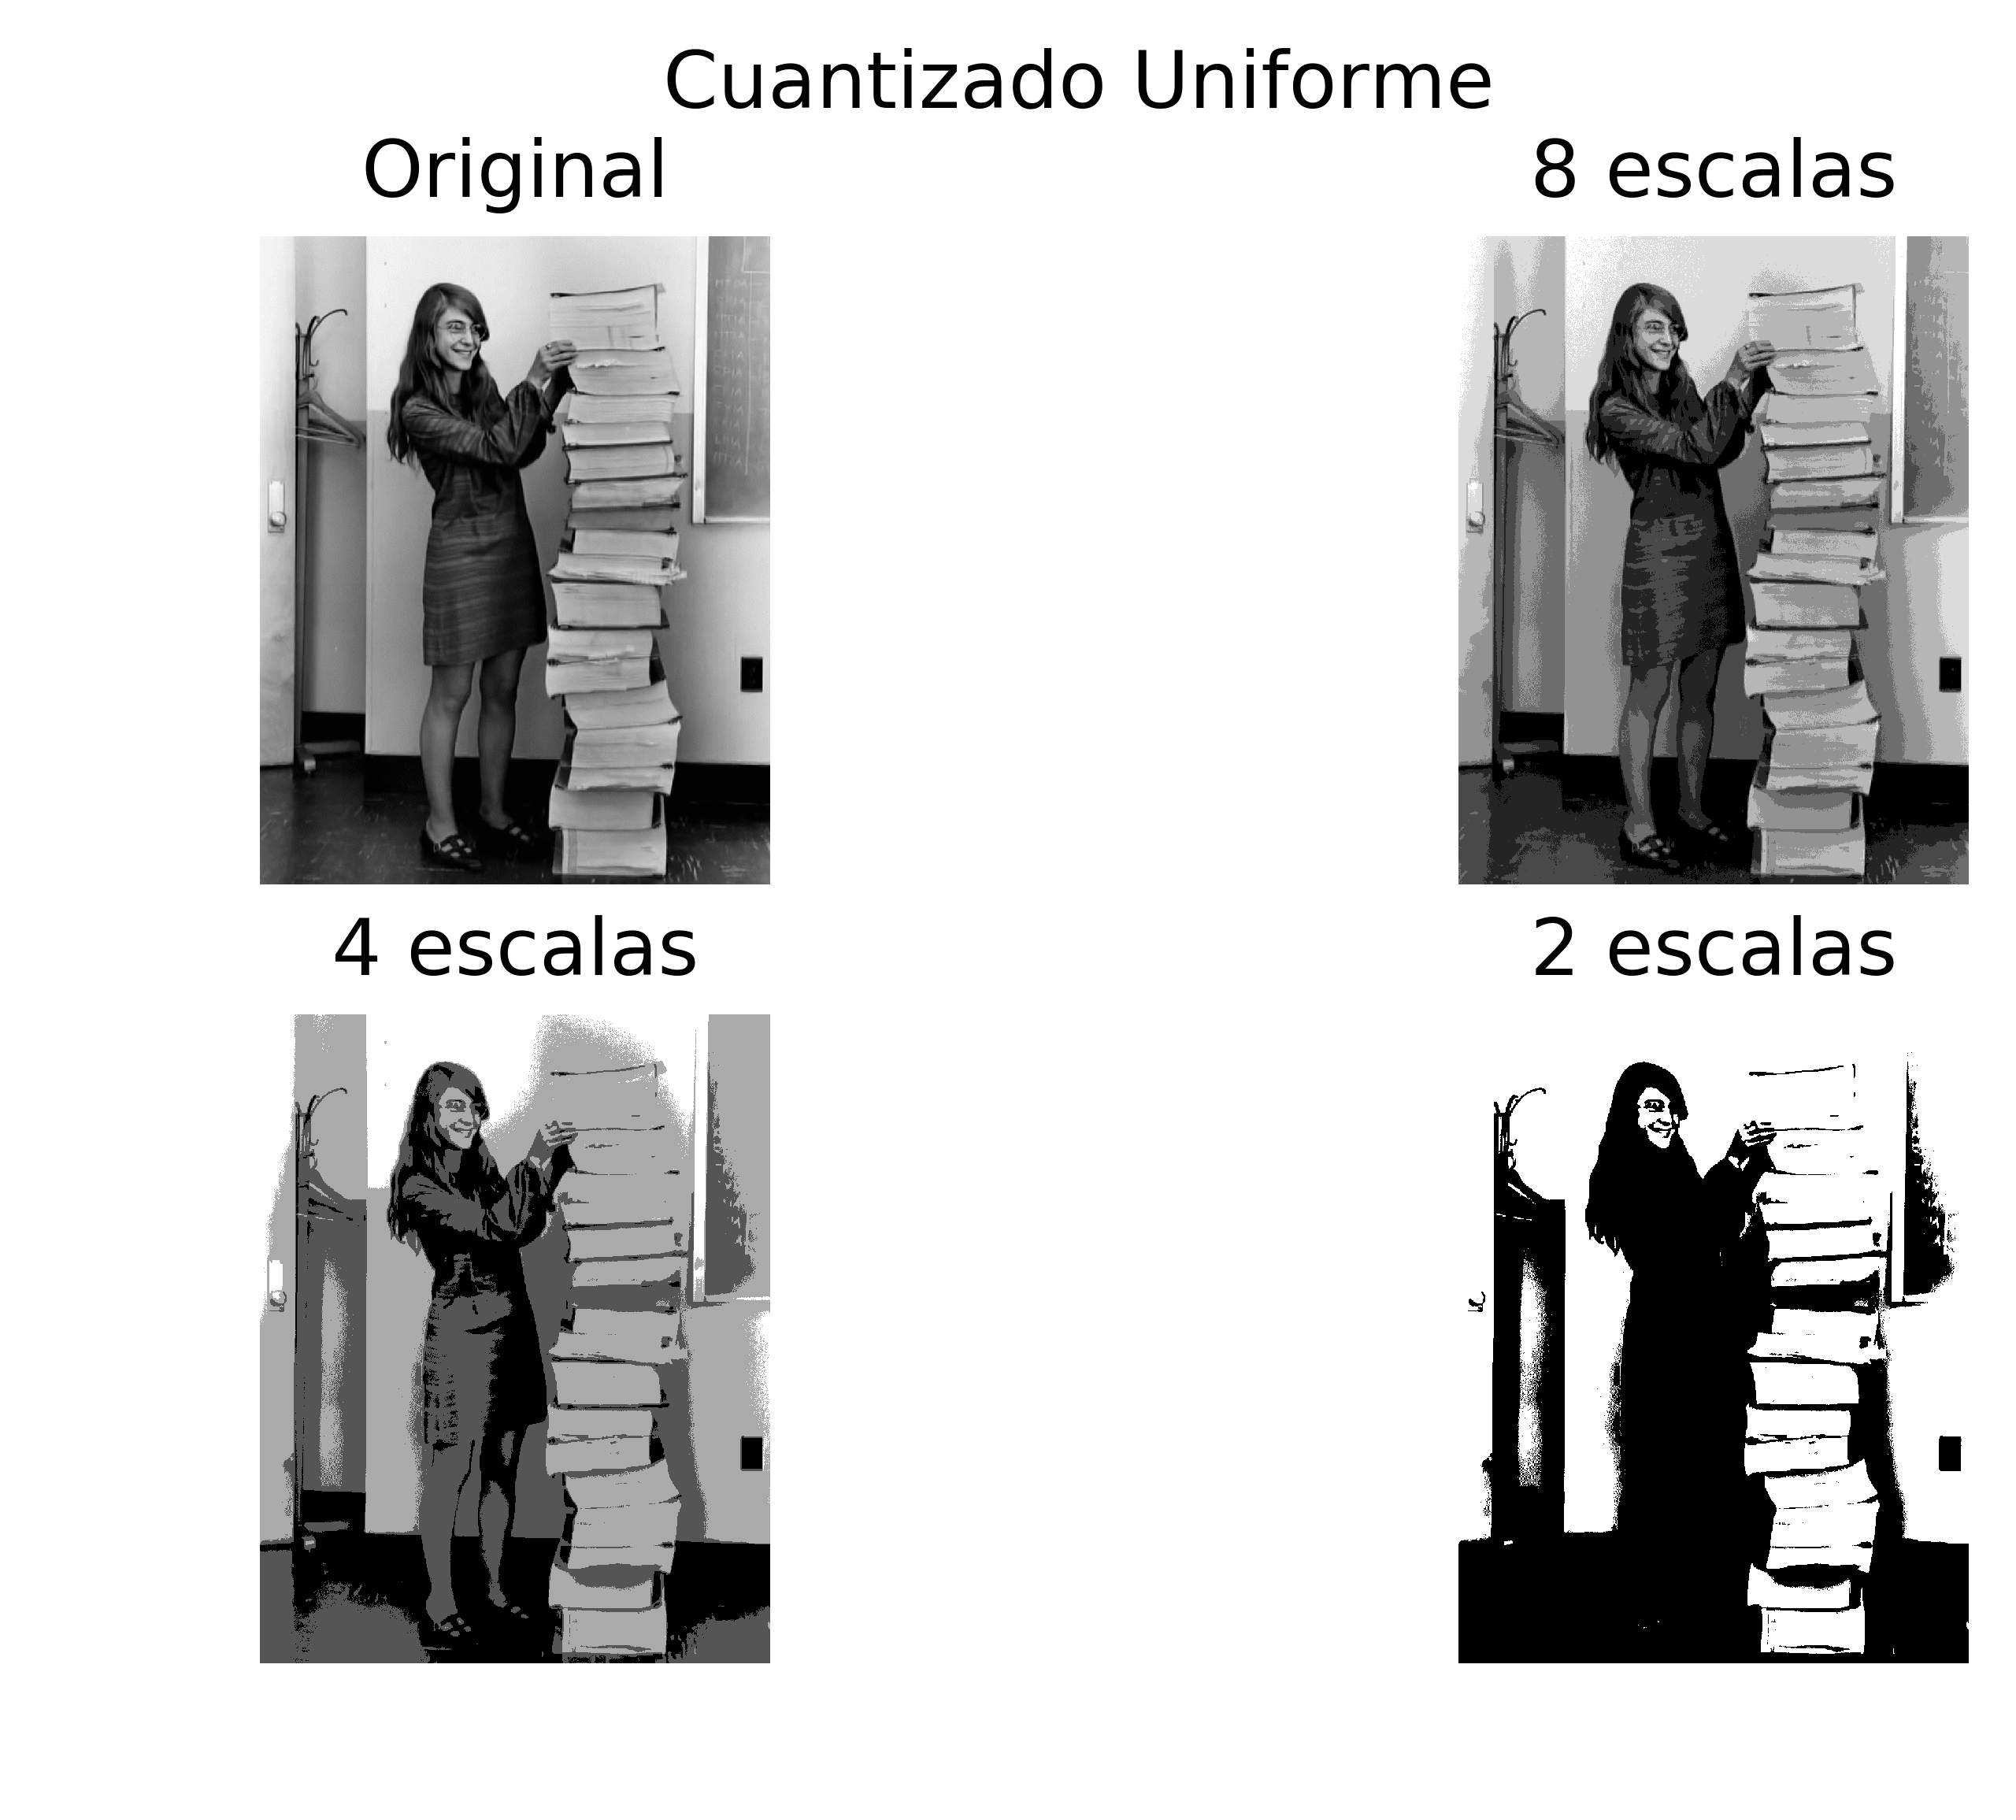

In [8]:
fig = plt.figure(dpi = 600)
fig.suptitle('Cuantizado Uniforme')
ax = plt.subplot(2,2,1)
ax.imshow(imag_gray, cmap='gray')
plt.title('Original')
plt.axis('off')
ax = plt.subplot(2,2,2)
ax.imshow(imag_out_gris_8, cmap='gray')
plt.title('8 escalas')
plt.axis('off')
ax = plt.subplot(2,2,3)
ax.imshow(imag_out_gris_4, cmap='gray')
plt.title('4 escalas')
plt.axis('off')
ax = plt.subplot(2,2,4)
ax.imshow(imag_out_gris_2, cmap='gray')
plt.title('2 escalas')
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP7_Cuantizado_Uniforme.png')
plt.savefig(nom_arch)

plt.show()


### Dithering

In [9]:
imag_out_gris_dith_8 = RSMP.Cuantizar_gris(imag_gray, 8, modo='dithering')
imag_out_gris_dith_4 = RSMP.Cuantizar_gris(imag_gray, 4, modo='dithering')
imag_out_gris_dith_2 = RSMP.Cuantizar_gris(imag_gray, 2, modo='dithering')

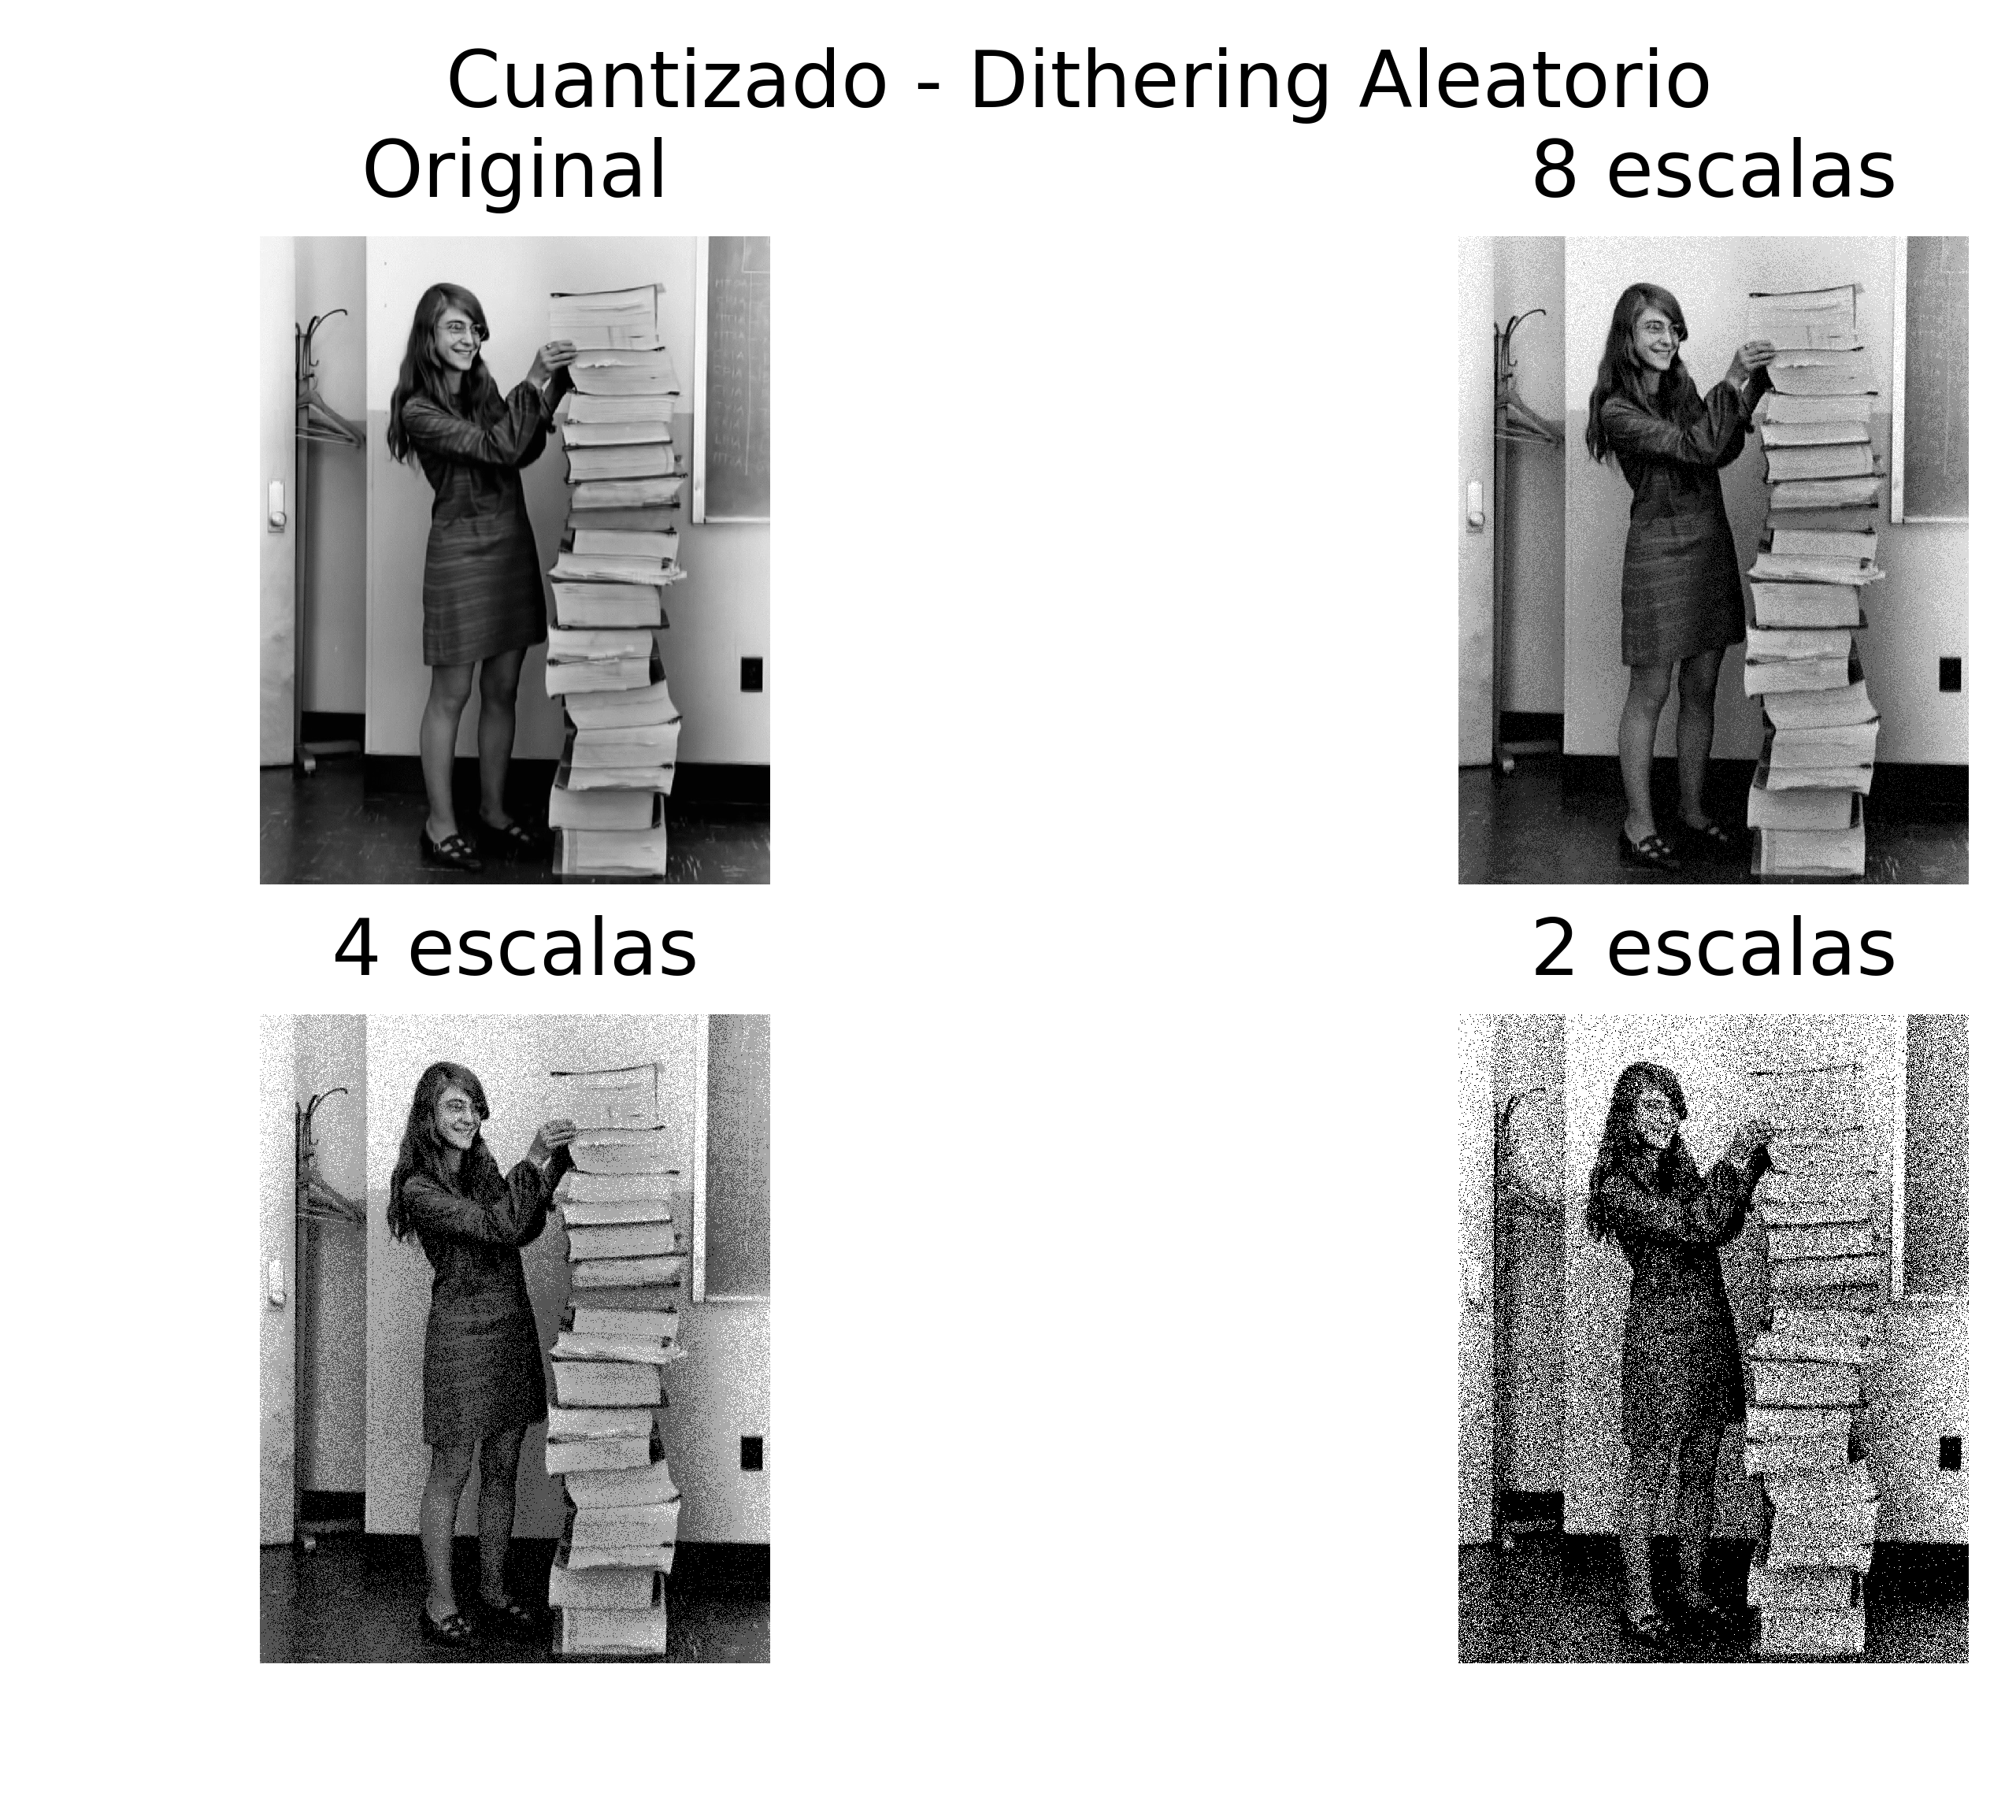

In [10]:
fig = plt.figure(dpi = 600)
fig.suptitle('Cuantizado - Dithering Aleatorio')
ax = plt.subplot(2,2,1)
ax.imshow(imag_gray, cmap='gray')
plt.title('Original')
plt.axis('off')
ax = plt.subplot(2,2,2)
ax.imshow(imag_out_gris_dith_8, cmap='gray')
plt.title('8 escalas')
plt.axis('off')
ax = plt.subplot(2,2,3)
ax.imshow(imag_out_gris_dith_4, cmap='gray')
plt.title('4 escalas')
plt.axis('off')
ax = plt.subplot(2,2,4)
ax.imshow(imag_out_gris_dith_2, cmap='gray')
plt.title('2 escalas')
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP7_Cuantizado_Dithering.png')
plt.savefig(nom_arch)

plt.show()


### Scan-Line

In [11]:
imag_out_gris_scan_8 = RSMP.Cuantizar_gris(imag_gray, 8, modo='scan-line')
imag_out_gris_scan_4 = RSMP.Cuantizar_gris(imag_gray, 4, modo='scan-line')
imag_out_gris_scan_2 = RSMP.Cuantizar_gris(imag_gray, 2, modo='scan-line')

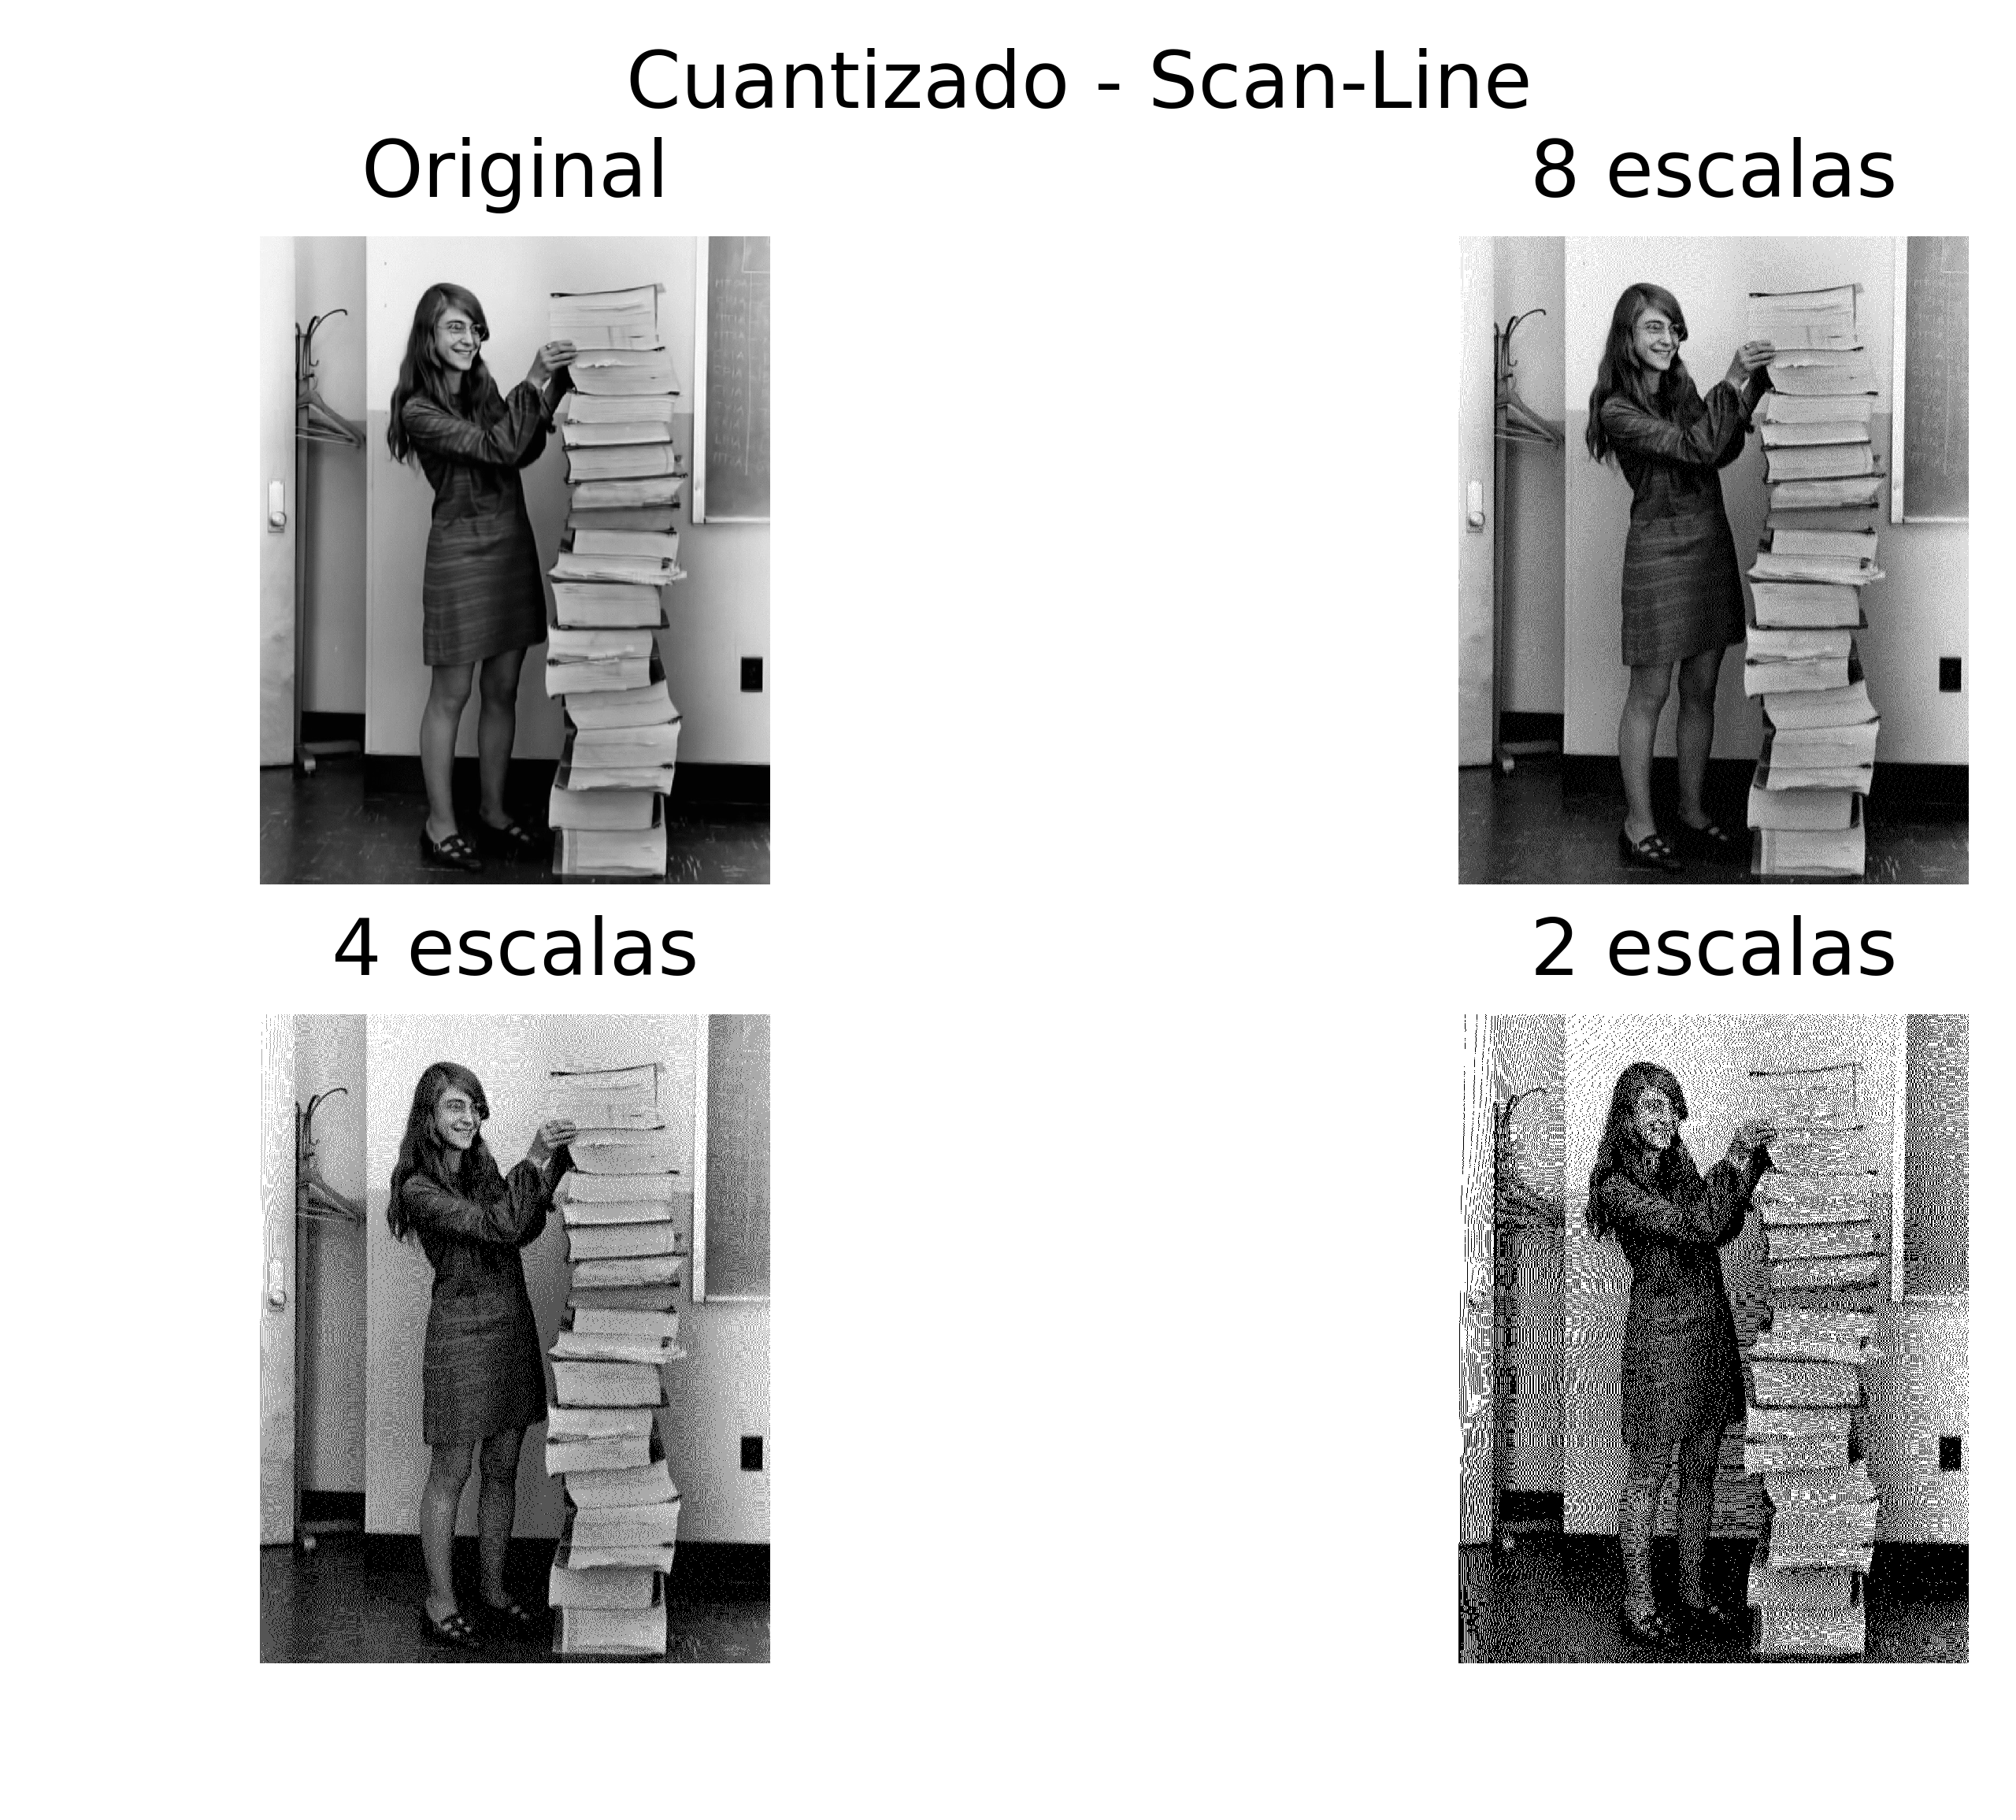

In [12]:
fig = plt.figure(dpi = 600)
fig.suptitle('Cuantizado - Scan-Line')
ax = plt.subplot(2,2,1)
ax.imshow(imag_gray, cmap='gray')
plt.title('Original')
plt.axis('off')
ax = plt.subplot(2,2,2)
ax.imshow(imag_out_gris_scan_8, cmap='gray')
plt.title('8 escalas')
plt.axis('off')
ax = plt.subplot(2,2,3)
ax.imshow(imag_out_gris_scan_4, cmap='gray')
plt.title('4 escalas')
plt.axis('off')
ax = plt.subplot(2,2,4)
ax.imshow(imag_out_gris_scan_2, cmap='gray')
plt.title('2 escalas')
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP7_Cuantizado_ScanLine.png')
plt.savefig(nom_arch)

plt.show()
